In [1]:
# With a clean dataset of all climbing routes and all sport routes across states, we can now analyze:

# The distribution of sport climbing routes across states by grade.
    # Which state has the hardes sport climbing routes (most routes >=8a)?
    # How many hard grades (>= 8a) are there in the states?
    # Which state has the most sport climbing routes?
    # Since trad climbing is very common in the US, which state has the most trad routes?
    # Which state has the most sport climbing routes relative to all types of climbing?

    # For a more fair/relevant comparison, lets consider state area:
        # Which state has the most dense distribution of sport routes?


# Analysis of US Rock climbing data
After extracting and cleaning OpenBeta's export of Mountain Projects database of rock climbs within the US (https://github.com/OpenBeta/climbing-data), further cleaning of the data was required to obtain a clean, workable file for analysis (see data_preparation.ipynb). The final result was saved under Data_final.xslx.

In this document we aim to look at the spread of sport climbing routes across various US states. While the analysis is mainly focused on getting a better understanding of the discipline of sport climbing, we will also take a look at other disciplines and their prevelance.

A quick explanation of the three main disciplines of rock climbing discussed in this report:

**Sport climbing** involves ascending a rock face using pre-placed bolts for protection, **trad (traditional) climbing** requires climbers to place their own removable gear for protection, and **bouldering** involves climbing shorter rock formations without ropes, typically only a few meters high and with portable soft mattresses to protect any falls.



In [2]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import glob

# import the data
data = pd.read_excel("G:\My Drive\Trainings\Python\Trainings_file\climbing project\Cleaned dataset\Data_final.xlsx")

# for normalization of the route count to the the size of the state later on in the analysis, 
# we also have to import data of the state size which is not included in our initial dataset.
# To match the external data with our internal data, we need to export the state name abbrevations.

all_states_np = data['State'].unique()
all_states_df = pd.DataFrame(all_states_np)
all_states_df.to_excel('G:\My Drive\Trainings\Python\Trainings_file\climbing project\Cleaned dataset\All_states_vec.xlsx', index = False)

# We generate a file containing the state size outside of python and import it afterwards.

# The states from our dataset were matched with the size of each state in Excel.
# The size was obained from: https://statesymbolsusa.org/symbol-official-item/national-us/uncategorized/states-size
# We now import the generated file containing the sizes.
state_size = pd.read_excel("G:\My Drive\Trainings\Python\Trainings_file\climbing project\Cleaned dataset\State_size.xlsx")
data = data.merge(state_size, on='State', how='outer')



In [3]:
# Make sure the column 'French grading' is of type str so the x-axis in graphs is sorted correctly.
# To avoid errors with NaN values we make them blank.
data.fillna('', inplace=True)
data['French_grading'] = data['French_grading'].astype("string")

# Filter the data set for only sport routes.
# Sport routes are labelled as TRUE in the df which is interpreted as 1 by Python.
# We create a copy of data clled sport to make the df independent.
sport = data[data.sport == 1].copy()
# Filter out ungraded routes
sport = sport[sport['French_grading'] != '']


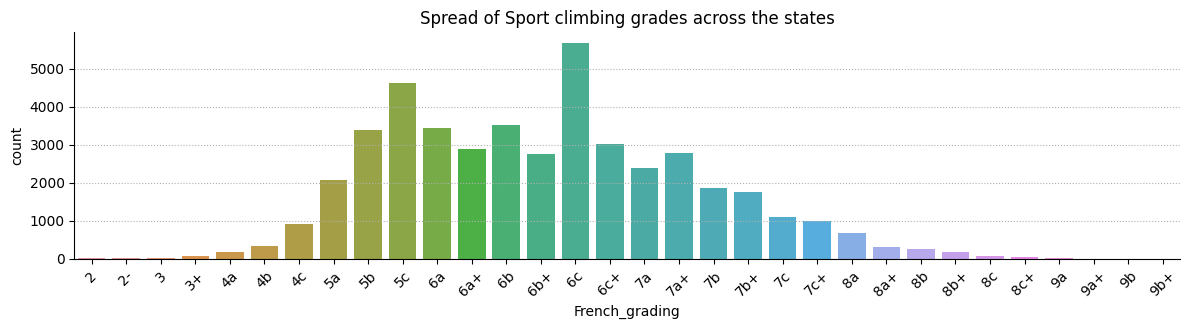

In [4]:
# Before we plot the spread of sport grades, we want to filter out unimportant grades that correspond to walking (1-, 1, 1+) or are non existent in the states (9c).
# The ~ operator acts as a NOT operator effectively doing the oposite.
sport_trimmed = sport[~sport['French_grading'].isin(['1', '1-', '1+', '9c'])]
            
# plot the spread of grades across the states in a count plot.
total_sport_count_plot = sns.catplot(x= 'French_grading', kind = 'count', data = sport_trimmed, height= 3, aspect= 4)

# add gridlines for easier readability.
plt.grid(which= 'major', axis= 'y', linestyle= 'dotted')

# rotate the x axis labels to make it more readable.
plt.xticks(rotation=45)
# add a title
plt.title('Spread of Sport climbing grades across the states')
# Show the plot
plt.show()


In the graph above we can see that most sport climbing routes in the US are graded between 5a and 7b. This is expected, as it corresponds to the average difficulty from beginner to intermediate. Routes graded 7b or harder are considered difficult. In the following we want to plot the same distribution but by states individually to get quickly get a more high level overview for each state.

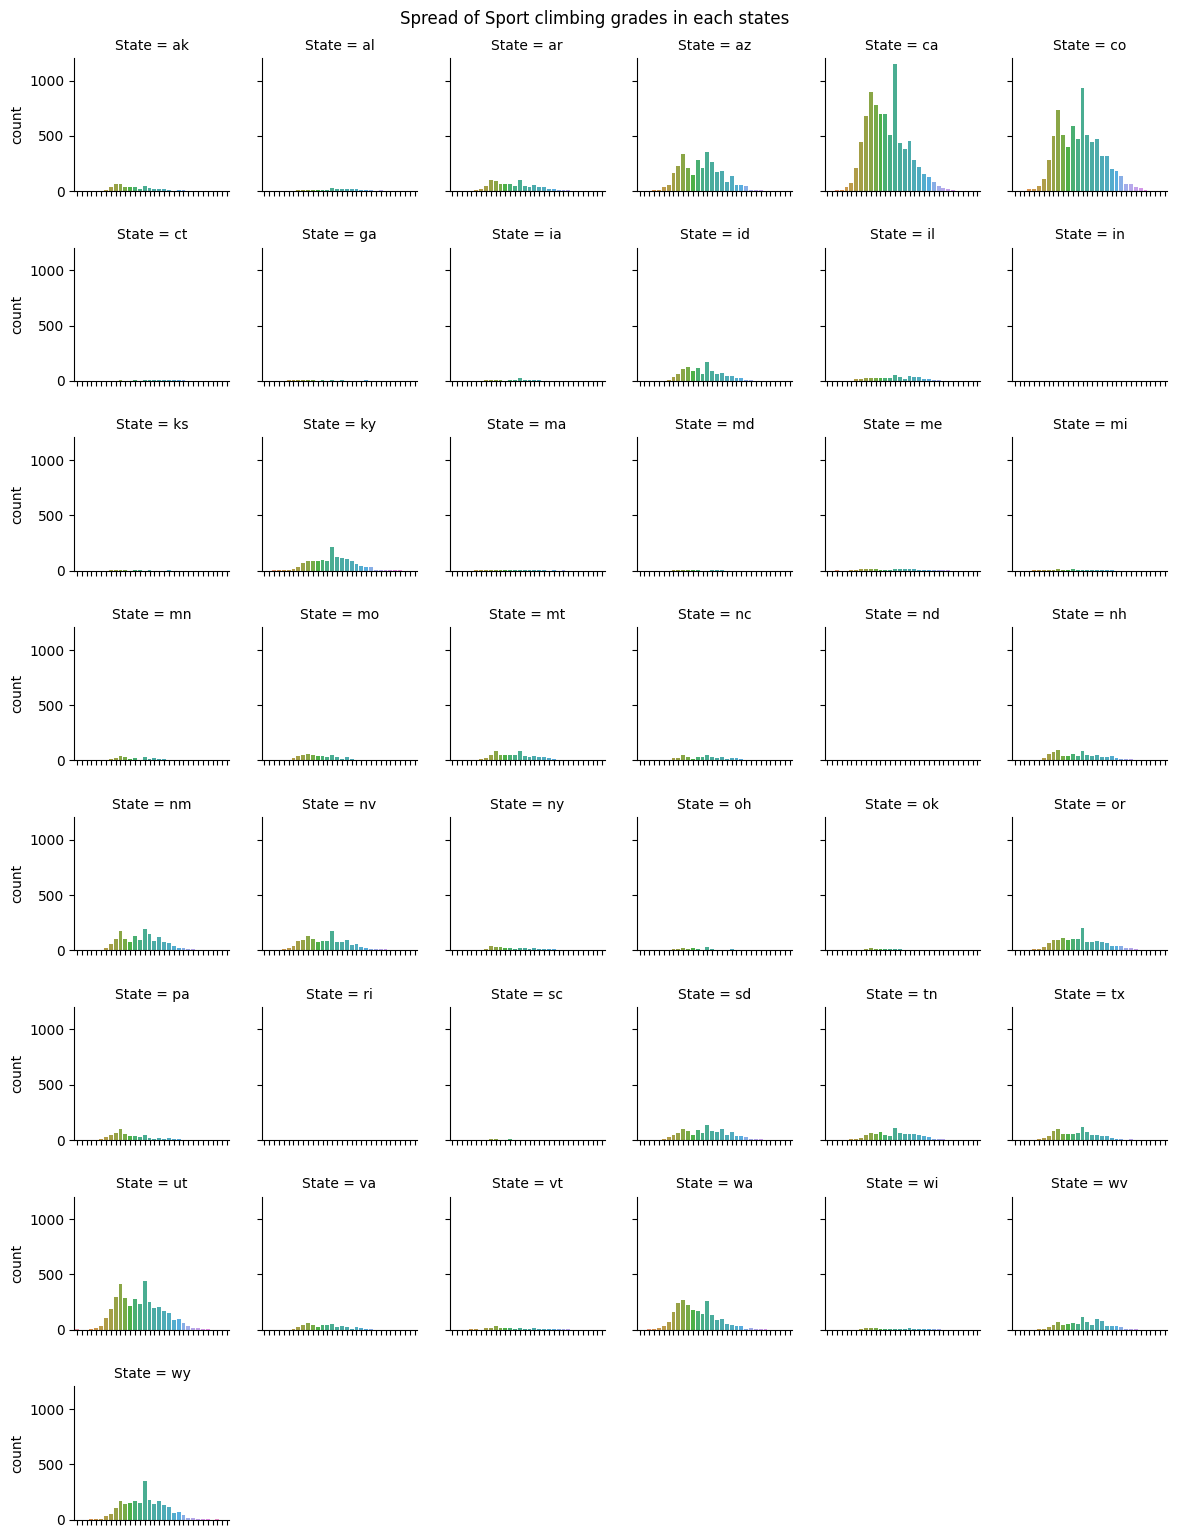

In [5]:
# Plot the spread of grades across the states in a count plot.
pp= sns.catplot(x= 'French_grading', kind = 'count', data = sport_trimmed, col = 'State', col_wrap= 6, height= 2,
                col_order= sorted(sport['State'].unique()))

# Add a title to the FaceGrid and position it above the graph.
pp.fig.subplots_adjust(top=0.95)
pp.fig.suptitle('Spread of Sport climbing grades in each states')



# remove the labels to make it more readable for a purely high level overview.
sns.FacetGrid.set_xticklabels(self= pp, label=None)
sns.FacetGrid.set(self=pp, xlabel=None)

# Show the plot
plt.show()

Since we did plot the spread of sport routes in each state without normalization to the states we can make the observation that the distribution or quantity of sport climbing routes across the different states is quite heterogeneous. In the following we want to get a more comprehensive overview of that finding by plotting the total count of sport routes in every state as well as the states proportion (%) of all sport routes in the US. 

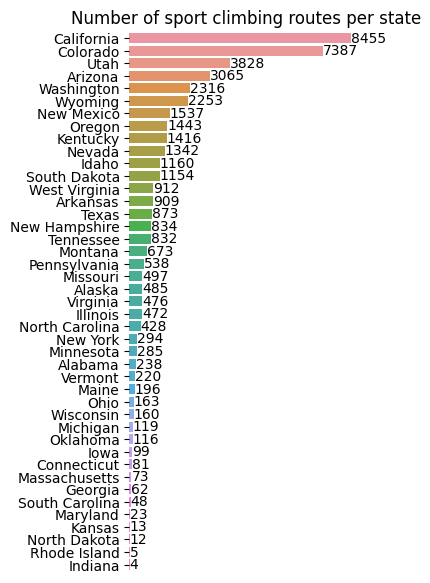

In [6]:
# adjust figure size and create a countplot counting all sport routes. List the occurences in descending order.
plt.figure(figsize=(3,7))
state_sport_counts_plot = sns.countplot(data = sport, y = 'State_name_full',
            order= sport['State_name_full'].value_counts().index)

# remove the frame from the plot as well as the x-axis. Since we label the bars, the axis is not needed.
sns.despine(left=True, bottom=True)
state_sport_counts_plot.set(xlabel=None, xticklabels=[], ylabel=None)
state_sport_counts_plot.tick_params(bottom=False)

# Add the count of each bar to the graph.
plt.bar_label(container=state_sport_counts_plot.containers[0], labels=sport['State'].value_counts())

# Add a title
plt.title('Number of sport climbing routes per state')

plt.show()

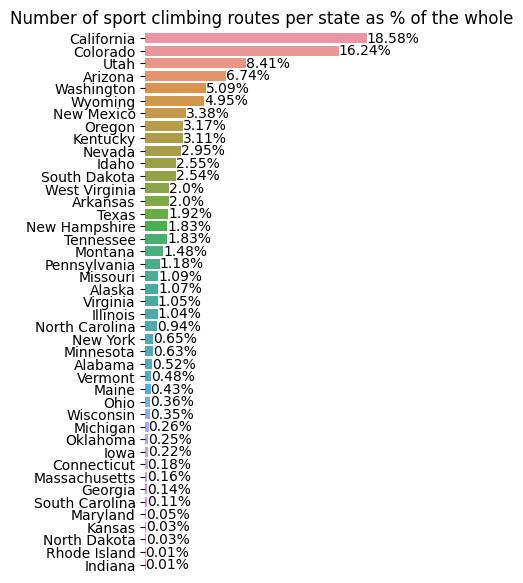

In [7]:
# Here we want to plot the % instead of the count.

# adjust figure size and create a countplot counting all sport routes. List the occurences in descending order.
plt.figure(figsize=(3,7))
stateperc = sns.countplot(data = sport, y = 'State_name_full',
            order= sport['State_name_full'].value_counts().index)

# remove the frame from the plot as well as the x-axis. Since we label the bars, the axis is not needed.
sns.despine(left=True, bottom=True)
stateperc.set(xlabel=None, xticklabels=[], ylabel=None)
stateperc.tick_params(bottom=False)

# Calculate the percentage of sport routes of each state as a fraction of the total.
state_sport_counts = sport['State'].value_counts()
total_state_sport = len(sport)
state_sport_percentages = (state_sport_counts / total_state_sport) * 100
# Round the percentage to two decimals.
state_sport_percentages = state_sport_percentages.round(2)

# Label the plot with the percentages.
plt.bar_label(container=stateperc.containers[0], labels=(state_sport_percentages.astype(str) + '%'))

# Add a title
plt.title('Number of sport climbing routes per state as % of the whole')

plt.show()

Because states are vastly different in size, lets look at the density of sport climbing routes within each state to have a more normalized comparison. Therefore we use data on size obtained from: https://statesymbolsusa.org/symbol-official-item/national-us/uncategorized/states-size. We then merged the data on state size to our data of sport climbing routes and normalized the number of sport routes to the size of the state. A sample of the dataset is shown in the table below. The data is sorted by the Number of sport routes per sqkm.

In [8]:
# Transform the np array of sport route counts to a dataframe and merge it with the state_size dataframe, only keeping states present in our dataset.
# Save the new df as state_size_norm_data.
state_sport_counts_df = pd.DataFrame(state_sport_counts)
state_sport_counts_df.rename(columns={'count': 'sport_route_count'}, inplace=True)
state_size_norm_data = state_size.merge(state_sport_counts_df, on='State', how='right')

# Add a new column containing the normalized sport route count and convert the unit from routes/sqm to routes/sqkm.
state_size_norm_data['norm_sport_route_count'] = state_size_norm_data['sport_route_count']/state_size_norm_data['State_sqMiles']*2.56

# Print the first 10 most dense sport climbing states in a table with descending order.
sel_table = state_size_norm_data.sort_values(by='norm_sport_route_count', ascending=False)
# Drop the column holding the state abbrevation.
sel_table.drop(columns=['State'], inplace = True)
# Reset the index and make it start at 1 to visually list the top 10 states.
sel_table.reset_index(drop=True, inplace=True)
sel_table.index += 1


# We use Pandas display function to print a prettier table. Therefore we also rename the columns.                                                                                               
styled_table = sel_table.rename(columns=
                                {"State_name_full": "State", "State_sqMiles": "State size (sqM)", 
                                 'sport_route_count': 'Nr. of Sport routes', 'norm_sport_route_count': 'Sport routes/sqkm'})

# Apply the custom style with the background color of the table header to the DataFrame using set_table_styles
styled_table.head(10).style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey')]}
])




,State,State size (sqM),Nr. of Sport routes,Sport routes/sqkm
1,New Hampshire,8969,834,0.238047
2,Colorado,103730,7387,0.182307
3,California,155973,8455,0.138773
4,Utah,82168,3828,0.119264
5,West Virginia,24087,912,0.096929
6,Kentucky,39732,1416,0.091235
7,Washington,66582,2316,0.089047
8,Arizona,113642,3065,0.069045
9,Vermont,9249,220,0.060893
10,Wyoming,97105,2253,0.059396


Plotting the density of sport climbing routes across states while keeping the order of the states following the total number of sport climbs per state, paints a different picture.
New Hampshire, while by far not having the most sport climbing routes, has the densest spread of routes across the state. This is likely due to the relatively small size of the state but its possession of the White Mountains and Lakes Region. After New Hampshire, California, Colorado and Utah are still leading the charts.

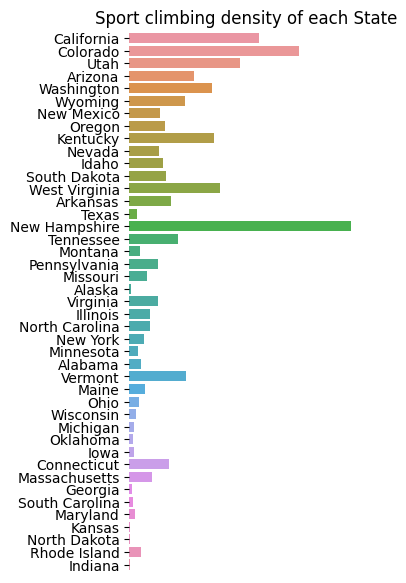

In [9]:
# Plot the normalized data
plt.figure(figsize=(3,7))
norm_sport_plt = sns.barplot(data = state_size_norm_data, y = 'State_name_full', x= 'norm_sport_route_count',
            order= state_size_norm_data['State_name_full'])

# remove the frame from the plot as well as the x-axis. Since we label the bars, the axis is not needed.
sns.despine(left=True, bottom=True)
norm_sport_plt.set(xlabel=None, xticklabels=[], ylabel=None)
norm_sport_plt.tick_params(bottom=False)

# Add a title. The semicolon prevents the print out of the title as extra text.
plt.title('Sport climbing density of each State');

Now that we looked at the distribution of sport climbing routes across states, we want to dig into the more difficult routes. In the States, at the time this data was extracted, there were 1569 sport routes graded 8a or harder and only 21 routes graded 9a or harder. This makes up 3.44 % of all sport routes. A list of the number of hard sport routes in the 20 State that hold the most is shown below. The mean percentage of hard routes in each State is 5.8 % as visualized by the violin plot.

In [10]:
# Filter for sport routes graded 8a or higher. We exclude the 9c routes because we know they are nor real. 
# There are 2 routes graded 9c in the world and they are not in the states.
hard_sport = sport[(sport['French_grading'] >= '7c+') & (sport['French_grading'] != '9c')]

# Number of hard sport routes
hard_sport['route_name'].count()
hardest_sport = sport[(sport['French_grading'] >= '9a') & (sport['French_grading'] != '9c')]

# Proportion of hard sport routes
hard_sport['route_name'].count() / sport['route_name'].count() * 100

# the number of hard sport routes per state.
hard_state = hard_sport.groupby('State_name_full').size().sort_values(ascending=False)

# the ratio of hard sport routes per state
ratio_hard = hard_sport.groupby('State_name_full').size() / sport.groupby('State_name_full').size() * 100
ratio_hard = ratio_hard.round(2).sort_values(ascending=False)

# merging the ratio and number of routes.
hard_merged = pd.concat([hard_state, ratio_hard], axis=1)
hard_merged = hard_merged.reset_index()
# columns did not have a name, give them a name
hard_merged = hard_merged.rename(columns={0: 'Count of Hard Routes', 1: '% of the States total'})

# To print a styled table withouth trailing zeros we need to format the columns
# first we focus on only the head to remove NaN values, then we change the type from float to int and str.
hard_merged_head = hard_merged.head(21).copy()
hard_merged_head['Count of Hard Routes'] = hard_merged_head['Count of Hard Routes'].astype(np.int64)
hard_merged_head['% of the States total'] = hard_merged_head['% of the States total'].astype(str)

# Rename the column title
hard_merged_head = hard_merged_head.rename(columns={'State_name_full' : 'State'})

# print the styled table.
hard_merged_head.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey')]}])

,State,Count of Hard Routes,% of the States total
0,Colorado,523,7.08
1,California,328,3.88
2,Utah,235,6.14
3,Wyoming,155,6.88
4,Arizona,144,4.7
5,Oregon,132,9.15
6,Kentucky,88,6.21
7,South Dakota,85,7.37
8,Nevada,85,6.33
9,Washington,82,3.54


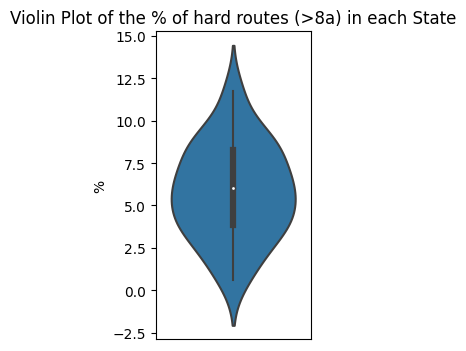

In [11]:
# Calculate the mean ratio of hard sport routes for each State.
hard_merged['% of the States total'].mean().round(2)

# Plot the mean and Standard deviation of the percentage of hard sport climbing routes per State.
plt.figure(figsize=(2,4))
hard_vio = sns.violinplot(data= hard_merged, y ='% of the States total', label = 'Mean')
plt.title('Violin Plot of the % of hard routes (>8a) in each State')
hard_vio.set(ylabel= '%')
hard_vio.tick_params(bottom=False)

Since some areas and the states in general are more known for trad climbing rather than sport climbing, due to places like Yosemity Valley, it is of interest to compare the prevelance of these two dispcipline. Below we want to plot a heatmap showing the distribution of climbing styles in each state. We ignore Toprope, Ice or Mixed climbing since these disciplines are generally to be assumed fewer than trad, sport or bouldering and not the disciplines we are interested in. For our analysis we also want to focus only on states that have more than a total of 1000 routes across the three disciplines sport, boulder and trad climbing. An alphabeteically sorted table of the prevalence of each discipline in each state is shown in the table below.


In [12]:
# In the following we want to generate the table holding the information we try to visualize:
# The total count of each of the threee disciplines (trad, boulder, sport) within each state plus the percentage the discipline represents.

# First we filter the data frame holding only the columns we want and create and independent copy.
data_filtered = data[['State_name_full', 'trad', 'boulder', 'sport']].copy()
# We fill NA values and transform the discipline columns to their actual type, from pbject to bool.
data_filtered.fillna(0, inplace=True)
data_filtered[['trad', 'sport', 'boulder']] = data_filtered[['trad', 'sport', 'boulder']].astype('bool')
data_filtered.reset_index()

# Next we group by State and get the sum of each discipline per state.
sum_types_per_state = data_filtered.groupby('State_name_full').sum()

# We create a new column holding the total number of routes across all discipline in each state
# and calculate the % of each discipline.
sum_types_per_state['total'] = sum_types_per_state['trad'] + sum_types_per_state['boulder'] + sum_types_per_state['sport']
sum_types_per_state['trad_per'] = sum_types_per_state['trad'] / sum_types_per_state['total'] *100
sum_types_per_state['boulder_per'] = sum_types_per_state['boulder'] / sum_types_per_state['total'] *100
sum_types_per_state['sport_per'] = sum_types_per_state['sport'] / sum_types_per_state['total'] *100

# Before we show the table we exclude all states that only have less than 1000 routes in total 
# to make the overview more comprehensive and meaningful.
sum_types_per_state = sum_types_per_state.loc[sum_types_per_state['total'] >= 1000]

# Here we create a new variable holding the average and sum of each column.
sum_per_types_per_state_average = sum_types_per_state.mean().round(0)
sum_per_types_per_state_table_sum = sum_types_per_state.sum().round(0)

# In the following we want to add the sum and the average of each column to the table.
# The sum row is not wanted for the heatmap we plot later on, therefore we create an independent copy of the 
# df and save it under a new variable.
sum_types_per_state_table = sum_types_per_state.copy()

# After calculating the sum and average we add them to the dfs.
sum_types_per_state.loc['Average across states'] = sum_per_types_per_state_average
sum_types_per_state_table.loc['Average across states'] = sum_per_types_per_state_average
sum_types_per_state_table.loc['Sum across states'] = sum_per_types_per_state_table_sum


# To get an easier grasp of the values in the table, we convert the values to integer, 
# removing trailing zeros or long decimals.
sum_types_per_state_table['boulder_per'] = sum_types_per_state_table['boulder_per'].astype('int')
sum_types_per_state_table['trad_per'] = sum_types_per_state_table['trad_per'].astype('int')
sum_types_per_state_table['sport_per'] = sum_types_per_state_table['sport_per'].astype('int')
sum_types_per_state_table['boulder'] = sum_types_per_state_table['boulder'].astype('int')
sum_types_per_state_table['trad'] = sum_types_per_state_table['trad'].astype('int')
sum_types_per_state_table['sport'] = sum_types_per_state_table['sport'].astype('int')
sum_types_per_state_table['total'] = sum_types_per_state_table['total'].astype('int')

# Plot the table.
sum_types_per_state_table.style.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', 'lightgrey')]}])



,trad,boulder,sport,total,trad_per,boulder_per,sport_per
State_name_full,,,,,,,
Alabama,167,788,238,1193,13,66,19
Alaska,622,280,504,1406,44,19,35
Arizona,2722,2164,3065,7951,34,27,38
Arkansas,344,628,909,1881,18,33,48
California,10946,10261,8462,29669,36,34,28
Colorado,7242,6753,7464,21459,33,31,34
Connecticut,461,1143,81,1685,27,67,4
Idaho,632,594,1161,2387,26,24,48
Illinois,233,531,472,1236,18,42,38


To allow for easier comparison within each state rather than across states we also calcuted the fraction of each states discipline of the states total routes, as already shown in the table above. This is important since a heatmap of total numbers of routes across all states would not be very meaningful. To compare a states spread of disciplines to other states, we want the values to be normalized per state.
Therefore we plot the fraction of each discipline instead of total numbers.

[Text(-4.2777777777777874, 0.5, ''),
 Text(0.5, 1.0, 'The prevalence of each discpline within each State (%)')]

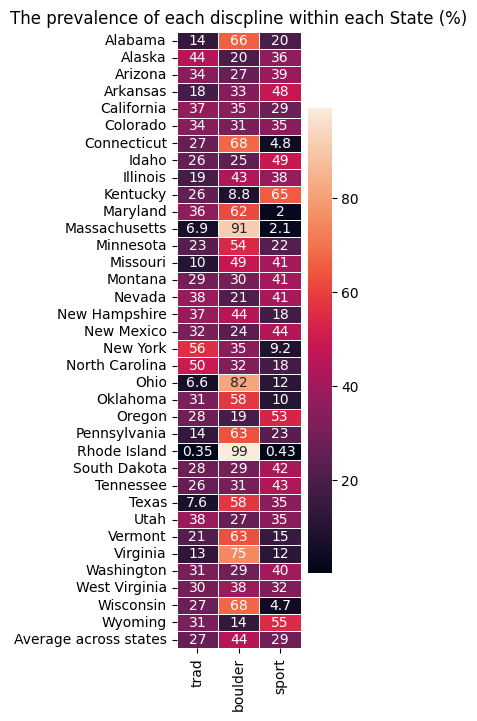

In [13]:
# Since a heatmap of total numbers of routes across all states would not be very meaningful 
# to compare a states spread of disciplines to other states, we want the values to be normalized per state.
# Therefore we plot the fraction of each discipline instead of total numbers.

# We filter out the total numbers, only keeping the fractions.
sum_per_types_per_state = sum_types_per_state[['trad_per', 'boulder_per', 'sport_per']]
# Renaming the column names for the graph.
sum_per_types_per_state = sum_per_types_per_state.rename(columns={'trad_per' : 'trad', 'boulder_per' : 'boulder', 'sport_per' : 'sport'})

# Plot the heatmap in a visual appealing way.
plt.figure(figsize=(2,8))
ax =sns.heatmap(sum_per_types_per_state, annot=True, linewidth=.5)
ax.set(ylabel='', title ='The prevalence of each discpline within each State (%)')


Unexpectedly the data shows a higher percentage of boulder routes in most states. Considering the total route counts of each discipline in the US, as shown by the last row in the table above, boulder routes are leading (~55k) but the spread is slightly more even across disciplines (trad and sport ~ 45k). This results in a total spread of routes in the US of about 37 % boulder, and 31 % sport or trad routes each.

## Summary
As a result of the analysis we have made the following observations:

_Distribution of rock climbs across states:_
- California and Colorado have by far the most sport climbing routes followed by Utah, Arizona, Washington and Wyoming
- Considering the size of the states, New Hampshire has the densest spread of sport climbing routes
- Bouldering is the most common type of rock climbing in the US considering only number of routes


_Sport grades:_
- Most sport climbing routes in the US are graded between 5a and 7b where 6c is the most comon grade.
- Only 5 States hold more than 100 routes graded 8a or harder
> - Colorado, California, Utah, Wyoming and Arizona
- The average % of hard sport routes (>8a) in each state is 5.8 %
- There are 1569 sport routes graded 8a or harder and only 21 routes graded 9a or harder
- The total percentage of hard sport routes across all sport routes in the states makes up only 3.44 %

If a person wants to move to a state with a high prevalence of rock climbing routes California, Colorado, New Hampshire or Utah are their best bet.
If a person is mainly interested in bouldering, other states like Massachusetts, Pennsylvania or Rhode Island would be of interest too.

## Disclaimer
Finally, it is important to note that this data set and analysis has limitations and can not be taken at face value but merely provide an estimate of the real situation.
- We assume the extracted dataset on GitHub to be complete which might not be the case
- The datset was extracted 3 years ago, so latest numbers are likely to differ
- The dataset is relying on entries on the website MountainProject, which might be incomplete or hold routes that do not exist.

